**<font size='6' color='red'> ch02. 한글 형태소 분석</font>**
# 1. 자연어 처리
- 일상적인 언어를 처리
- 자연어 처리 분야
    * 자연어 이해 : 형태소분석 -> pos tagging -> 의미 분석
    * 자연어 생성 : 대화분석 -> 다음 문장이나 단어를 출력(RNN, LSTM, ... GAN, 생성형 알고리즘)
- 활용분야 : 트렌드분석, 맞춤법검사, 번역기, 키워드분석, 쳇봇
# 2. 자연어처리 절차
- 전처리 : 단어, 어절 추출
- 분석 후보 생성 : 형태소 분리, 품사 태깅(pos tagging)
- 제약조건(불용어 처리) : 규칙 확인
- 분석 : 시각화(워드클라우드), 연관분석, RNN, LSTM, ... 
# 3. 한글 형태소 분석 엔진(Konlpy)
* 공통기능 : morphs(형태소 나누기), nouns(명사추출), pos(형태소로 나누어 품사 태그)
* HanNanum만의 기능 : analyze(형태소 후보 반환)
* Kkma만의 기능 : 텍스트를 문장별로 나누는 기능

- konlpy : python용 자연어 처리기(JPype1(C++ 버전:w14) 패키지를 의존)
    * pip install konlpy
        + HanNaum : 자바로 만든 형태소 분석기(JAVA_HOME 시스템변수)
        + Kkma : 서울대에서 자바로 만든 형태소 분석기(JAVA_HOME 시스템변수)
        + Komoran : 자바로 만든 형태소 분석기(JAVA_HOME 시스템변수)
        + Okr
    * pip install python-mecab-ko
        + MeCab : C++로 작성되었고, 저사양환경에서 사용 가능. 다양한 언어의 바인딩 지원
- konlp : R용 자연어 처리기

In [1]:
import os
os.environ.get('JAVA_HOME') # JAVA_HOME 있는지 확인
# VC++ 14 버전 이상 설치

'C:\\Program Files\\Java\\jdk-17'

In [3]:
# pip install jpype1 (내 OS와 python버전에 맞는 최신 버전의 whl 설치파일을 찾아 설치)
%ls

 D 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 2D13-14F8

 D:\ai\source\10_자연어처리 디렉터리

2024-12-27  오후 02:11    <DIR>          .
2024-12-27  오후 02:11    <DIR>          ..
2024-12-27  오후 02:12    <DIR>          .ipynb_checkpoints
2024-12-30  오전 09:44           328,835 ch01_NLTK자연어처리 패키지.ipynb
2024-12-30  오전 10:34             3,320 ch02_한글형태소분석.ipynb
2024-12-27  오전 09:14           344,509 JPype1-1.4.0-cp310-cp310-win_amd64.whl
2024-12-27  오전 09:14           351,472 JPype1-1.5.0-cp310-cp310-win_amd64.whl
2024-12-27  오전 12:00           356,064 jpype1-1.5.1-cp310-cp310-win_amd64.whl
               5개 파일           1,384,200 바이트
               3개 디렉터리  383,394,611,200 바이트 남음


In [4]:
! pip install jpype1-1.5.1-cp310-cp310-win_amd64.whl

Processing d:\ai\source\10_자연어처리\jpype1-1.5.1-cp310-cp310-win_amd64.whl


In [ ]:
# pip install konlpy 후, 아래의 코드가 실행이 안 될 경우
# 1. pip uninstall konply, -> pip uninstall jpype1
# 2. pip install jpype1-1.5.0-cp310-cp310-win_amd64.whl 둘중에 하나
# 2. pip install jpype1-1.4.0-cp310-cp310-win_amd64.whl 둘중에 하나
# 3. pip install konlpy

In [1]:
text = '''아름답지만 다소 복잡하기도 한 한국어는 전세계에서 13번째로 많이 사용되는 언어입니다'''

## 3.1 HanNanum

In [2]:
from konlpy.tag import Hannanum
hannanum = Hannanum(jvmpath=None, # 'C:\\Program Files\\Java\\jdk-17' 기본값이 자동적으로 찾아감 
                   max_heap_size=1024) # 기본값 1024b, '1g', '2048m'
hannanum.analyze(text)

[[[('아름답', 'paa'), ('지만', 'ecs')],
  [('아름답', 'paa'), ('지', 'ecs'), ('만', 'jxc')],
  [('아름답', 'paa'), ('지', 'ecx'), ('말', 'px'), ('ㄴ', 'etm')]],
 [[('다소', 'mag')], [('다소', 'ncn')]],
 [[('복잡', 'ncn'), ('하기', 'ncn'), ('도', 'jxc')],
  [('복잡', 'ncn'), ('하기', 'ncn'), ('도', 'ncn')],
  [('복잡', 'ncps'), ('하기', 'ncn'), ('도', 'jxc')],
  [('복잡', 'ncps'), ('하기', 'ncn'), ('도', 'ncn')],
  [('복잡', 'ncps'), ('하', 'xsms'), ('기', 'etn'), ('도', 'jxc')]],
 [[('하', 'pvg'), ('ㄴ', 'etm')],
  [('한', 'nnc')],
  [('한', 'ncn')],
  [('한', 'nbn')],
  [('하', 'px'), ('ㄴ', 'etm')]],
 [[('한국어', 'ncn'), ('는', 'jxc')]],
 [[('전세계', 'ncn'), ('에서', 'jca')],
  [('전세', 'ncn'), ('계', 'ncn'), ('에서', 'jca')],
  [('전', 'xp'), ('세계', 'ncn'), ('에서', 'jca')]],
 [[('13', 'nnc'), ('번', 'nbu'), ('째', 'xsnu'), ('로', 'jca')]],
 [[('많', 'paa'), ('이', 'xsa')], [('많이', 'mag')]],
 [[('사용', 'ncpa'), ('되', 'xsvn'), ('는', 'etm')]],
 [[('언어', 'ncn'), ('이', 'jp'), ('ㅂ니다', 'ef')]]]

- pos tagging chart 다운로드 
    * 구글에서 konlpy docs검색후 konlpy.org 한글버전 https://konlpy.org/ko/v0.4.3/
    * api 메뉴 클릭 -> '품사 태깅 클래스 간 비교(Comparision vetween POS tagging classes)' 클릭
    * '한국어 품사 태그 비교표(kor)

In [9]:
# 형태소 분석 : morphs 
print(hannanum.morphs(text))

['아름답', '지만', '다소', '복잡', '하', '기', '도', '하', 'ㄴ', '한국어', '는', '전세계', '에서', '13번', '째', '로', '많', '이', '사용', '되', '는', '언어', '이', 'ㅂ니다']


In [10]:
# 명사만 추출
print(hannanum.nouns(text))

['복잡', '한국어', '전세계', '13번', '사용', '언어']


In [14]:
# 품사태그
print(hannanum.pos(text)) # 기본값 ntags=9

[('아름답', 'P'), ('지만', 'E'), ('다소', 'M'), ('복잡', 'N'), ('하', 'X'), ('기', 'E'), ('도', 'J'), ('하', 'P'), ('ㄴ', 'E'), ('한국어', 'N'), ('는', 'J'), ('전세계', 'N'), ('에서', 'J'), ('13번', 'N'), ('째', 'X'), ('로', 'J'), ('많', 'P'), ('이', 'X'), ('사용', 'N'), ('되', 'X'), ('는', 'E'), ('언어', 'N'), ('이', 'J'), ('ㅂ니다', 'E')]


In [3]:
print(hannanum.pos(text, ntags=22)) 

[('아름답', 'PA'), ('지만', 'EC'), ('다소', 'MA'), ('복잡', 'NC'), ('하', 'XS'), ('기', 'ET'), ('도', 'JX'), ('하', 'PV'), ('ㄴ', 'ET'), ('한국어', 'NC'), ('는', 'JX'), ('전세계', 'NC'), ('에서', 'JC'), ('13', 'NN'), ('번', 'NB'), ('째', 'XS'), ('로', 'JC'), ('많', 'PA'), ('이', 'XS'), ('사용', 'NC'), ('되', 'XS'), ('는', 'ET'), ('언어', 'NC'), ('이', 'JP'), ('ㅂ니다', 'EF')]


In [10]:
# 퀴즈1 : text중에서 형용사만 추출
# print(hannanum.pos(text, ntags=22))
tagged_text = hannanum.pos(text, ntags=22)
tagged_text 
# [tagtext[0] for tagtext in tagged_text if tagtext[1]=='PA']
[token for token, tag in tagged_text if tag=='PA']

['아름답', '많']

In [11]:
# 퀴즈2 : text중에서 일반명사만 추출
# print(hannanum.pos(text, ntags=22))
[token for token, tag in tagged_text if tag=='NC']

['복잡', '한국어', '전세계', '사용', '언어']

## 3.2 Kkma 

In [19]:
from konlpy.tag import Kkma
kkma = Kkma() # 기본값 max_heap_size는 1024 바이트 '10m' '1g'
print(kkma.morphs(text)) # 형태소 분석

['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전세계', '에서', '13', '번째', '로', '많이', '사용', '되', '는', '언어', '이', 'ㅂ니다']


In [20]:
print(kkma.nouns(text)) # 명사만 추출

['복잡', '한국어', '전세계', '13', '13번째', '번째', '사용', '언어']


In [21]:
print(kkma.pos(text)) # ntags 조정 불가 품사 태그

[('아름답', 'VA'), ('지만', 'ECE'), ('다소', 'MAG'), ('복잡', 'NNG'), ('하', 'XSV'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MDN'), ('한국어', 'NNG'), ('는', 'JX'), ('전세계', 'NNG'), ('에서', 'JKM'), ('13', 'NR'), ('번째', 'NNB'), ('로', 'JKM'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETD'), ('언어', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EFN')]


In [27]:
# 보통명사(NNG) + 고유명사(NNP)
tegged_text = kkma.pos(text)
[word for word,tag in tegged_text if (tag=='NNG') | (tag=='NNP')]
[word for word,tag in tegged_text if tag=='NNG' or tag=='NNP']
[word for word,tag in tegged_text if tag in('NNG', 'NNP')]

['복잡', '한국어', '전세계', '사용', '언어']

## 3.3 Komoran

In [32]:
from konlpy.tag import Komoran
komoran = Komoran() # max_heap_size 기본값 1024바이트 '10m' '1g' 조정가능
# 형태소분석
print(komoran.morphs(text))

['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전', '세계', '에서', '13', '번', '째', '로', '많이', '사용', '되', '는', '언어', '이', 'ㅂ니다']


In [33]:
# 명사추출
print(komoran.nouns(text))

['한국어', '전', '세계', '번', '사용', '언어']


In [34]:
# 품사태그 (ntags 조정 불가)
print(komoran.pos(text))

[('아름답', 'VA'), ('지만', 'EC'), ('다소', 'MAG'), ('복잡', 'XR'), ('하', 'XSA'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MM'), ('한국어', 'NNP'), ('는', 'JX'), ('전', 'NNG'), ('세계', 'NNG'), ('에서', 'JKB'), ('13', 'SN'), ('번', 'NNB'), ('째', 'XSN'), ('로', 'JKB'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETM'), ('언어', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EC')]


In [35]:
# 일반(보통)명사('NNG'), 고유명사('NNP')
tegged_text=komoran.pos(text)
[word for word, tag in tegged_text if tag in ('NNG', 'NNP')]

['한국어', '전', '세계', '사용', '언어']

## 3.4 Mecab
- pip install python-mecab-ko

In [45]:
from mecab import MeCab # 제일 가벼운 엔진
mecab = MeCab()
# 형태소 추출
print('형태소추출 :',mecab.morphs(text))

형태소추출 : ['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전', '세계', '에서', '13', '번', '째', '로', '많이', '사용', '되', '는', '언어', '입니다']


In [41]:
# 명사 추출
print('명사추출 :',mecab.nouns(text))

['한국어', '세계', '번', '사용', '언어']


In [42]:
# 포스 태그
print('포스태그 :',mecab.pos(text))

[('아름답', 'VA'), ('지만', 'EC'), ('다소', 'MAG'), ('복잡', 'XR'), ('하', 'XSA'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MM'), ('한국어', 'NNG'), ('는', 'JX'), ('전', 'MM'), ('세계', 'NNG'), ('에서', 'JKB'), ('13', 'SN'), ('번', 'NNBC'), ('째', 'XSN'), ('로', 'JKB'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETM'), ('언어', 'NNG'), ('입니다', 'VCP+EC')]


In [44]:
print('일반명사(NNG)만 추출 :', [token for token, tag in mecab.pos(text) if tag=='NNG'])

일반명사만 추출 : ['한국어', '세계', '사용', '언어']


## 3.5 Twitter(Okt : Open Korean Text)
- konlpy 버전 0.4.5부터 Okt로 이름 변경. 가장 적게 쓰임

In [46]:
import konlpy
konlpy.__version__

'0.6.0'

In [57]:
from konlpy.tag import Twitter, Okt
# twitter = Twitter() # 워닝에러 
twitter = Okt()
print('구 추출 :',twitter.phrases(text)) # 구 추출
print('형태소 :',twitter.morphs(text))
print('명사만 :', twitter.nouns(text))
print('품사 태깅 :', twitter.pos(text))
print('명사만 :', [token for token, tag in twitter.pos(text) if tag=='Noun'])

구 추출 : ['다소', '한국어', '전세계', '13번째', '사용', '사용되는 언어', '13', '번째', '언어']
형태소 : ['아름답지만', '다소', '복잡하기도', '한', '한국어', '는', '전세계', '에서', '13', '번', '째', '로', '많이', '사용', '되는', '언어', '입니다']
명사만 : ['다소', '한국어', '전세계', '번', '사용', '언어']
품사 태깅 : [('아름답지만', 'Adjective'), ('다소', 'Noun'), ('복잡하기도', 'Adjective'), ('한', 'Verb'), ('한국어', 'Noun'), ('는', 'Josa'), ('전세계', 'Noun'), ('에서', 'Josa'), ('13', 'Number'), ('번', 'Noun'), ('째', 'Suffix'), ('로', 'Josa'), ('많이', 'Adverb'), ('사용', 'Noun'), ('되는', 'Verb'), ('언어', 'Noun'), ('입니다', 'Adjective')]
명사만 : ['다소', '한국어', '전세계', '번', '사용', '언어']


# 4. 말뭉치

In [61]:
! pip show konlpy

Name: konlpy
Version: 0.6.0
Summary: Python package for Korean natural language processing.
Home-page: http://konlpy.org
Author: Team KoNLPy
Author-email: konlpy@googlegroups.com
License: GPL v3
Location: c:\users\201-23\anaconda3\lib\site-packages
Requires: JPype1, lxml, numpy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [70]:
from konlpy.corpus import kolaw
# data = kolaw.open('constitution.txt').readlines() # 한줄씩 list로 가져옴
data = kolaw.open('constitution.txt').read() # text를 전부 가져옴
print('글자수 :', len(data))
print("%r" % data[:100]) # "%r" % 하면 \n 같이 출력

글자수 : 18884
'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의'


# 5. 워드 클라우드
- pip install wordcloud

In [72]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [96]:
import nltk 
from nltk.tokenize import RegexpTokenizer # 단어 추출 (정규표현식을 활용한)
from nltk.tag import pos_tag
emma = nltk.corpus.gutenberg.raw('austen-emma.txt')
emma[:100]
# 단어추출
ret = RegexpTokenizer('[\w]{3,}') # \w 숫자랑 알파벳만 가져오고 , 3글자 이상
words = ret.tokenize(emma) # 단어 추출
# 명사만 추출
emma_tags = pos_tag(words) 
# noun_list = [emma_tag[0] for emma_tag in emma_tags if emma_tag[1] in ('NN', 'NNS')]
noun_list = [word for word, tag in emma_tags if tag in ('NN', 'NNS')]
emma_noun = ' '.join(noun_list) # 스페이스 단위로 조인
emma_noun[:100]

'clever home disposition blessings existence years world distress daughters indulgent father conseque'

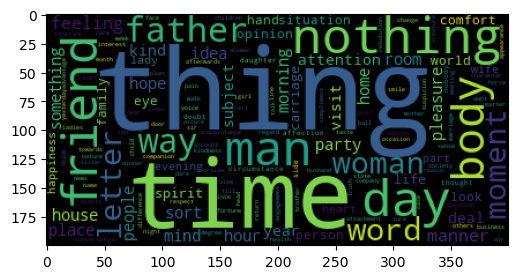

In [92]:
wordc = WordCloud()
wordc.generate(emma_noun)
plt.figure(figsize=(10,3))
plt.imshow(wordc)
plt.show()

In [97]:
# 명사 갯수
len(noun_list), len(set(noun_list))

(22147, 3564)

- 컬러맵
- https://matplotlib.org/stable/users/explain/colors/colormaps.html

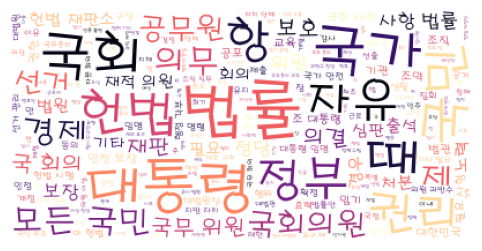

In [115]:
wordc = WordCloud(
            background_color='white', # 배경색
            max_words=400, # 표시될 단어의 최대 갯수
            relative_scaling=0.2, # 단어 빈도에 따른 크기 차이 조정
            colormap='magma', # colormap사이트에 있는거 사용가능
            font_path='C:/Windows/Fonts/H2PORL.TTF' # ttf 폰트 설정
)
wordc.generate(data_noun)
plt.figure(figsize=(10,3))
plt.imshow(wordc)
plt.axis('off') # 가로세로 눈끔없애기
plt.show()

In [118]:
# data 명사 추출 후 하나의 연결된 문자 : ' '.join(명사추출리스트)
from konlpy.tag import Kkma 
kkma = Kkma()
#word_list = kkma.nouns(data)
# 보통명사 , 고유명사
# 불용어 처리를 여기서 해도 됨
word_list = [word for word, tag in kkma.pos(data) if tag in('NNG', 'NNP')] 
data_noun = ' '.join(word_list)
data_noun[:20]

'대한민국 헌법 유구 역사 전통 국민 '

In [122]:
# 불용어 처리 (불용어 지정 + 불용어 사전)
from wordcloud import STOPWORDS
불용어 = STOPWORDS | {'대통령','때'}
불용어 = {'대통령','때'}
불용어 = set(['대통령', '때'])

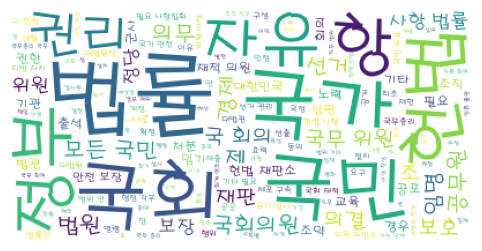

In [127]:
wordcloud = WordCloud(
            background_color='white',
            max_words=300, # 표시할 단어수
            font_path='C:/Windows/Fonts/H2PORL.TTF', # 폰트지정
            relative_scaling=0.2, # 단어 빈도에 따른 크기
            colormap='viridis', # 칼라맵
            stopwords=불용어,
)
wordcloud.generate(data_noun)
plt.figure(figsize=(10,3))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

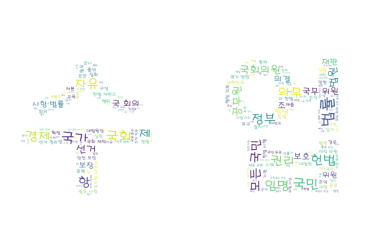

In [131]:
# 마스킹 : 워드 클라우드를 지정된 마스크 이미지에 맞도록 설정
from PIL import Image
import numpy as np
img = Image.open('data/test.png')
mask = np.array(img)
# plt.imshow(img)
# mask.shape
wordcloud = WordCloud(
            background_color='white',
            max_words=300, # 표시할 단어수
            font_path='C:/Windows/Fonts/H2PORL.TTF', # 폰트지정
            relative_scaling=0.2, # 단어 빈도에 따른 크기
            colormap='viridis', # 칼라맵
            stopwords=불용어,
            mask = mask
)
wordcloud.generate(data_noun)
plt.figure(figsize=(10,3))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

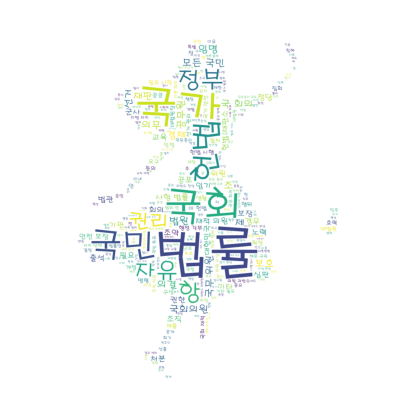

In [136]:
# .convert('RGB') 흑백 이미지 1채널 파일 -> 3채널
# .convert('RGBA') 4채널(RGB + 투명채널)
img = Image.open('data/test3.png') 
# plt.imshow(img)
# mask.shape
wordcloud = WordCloud(
            background_color='white',
            max_words=300, # 표시할 단어수
            font_path='C:/Windows/Fonts/H2PORL.TTF', # 폰트지정
            relative_scaling=0.2, # 단어 빈도에 따른 크기
            colormap='viridis', # 칼라맵
            stopwords=불용어,
            mask = mask
)
wordcloud.generate(data_noun)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

(241, 257, 3) uint8


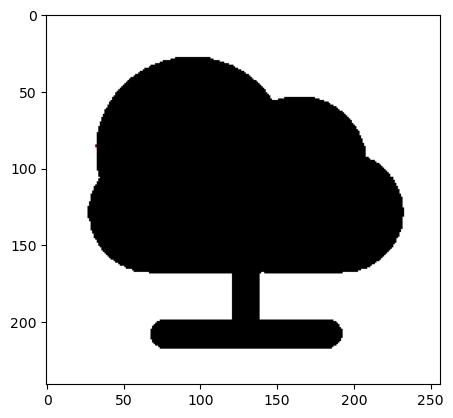

In [150]:
img = Image.open('data/test2.jpg')
mask = np.array(img)
mask = np.where(mask > 200, 255, 0).astype(np.uint8)
print(mask.shape, mask.dtype)
plt.imshow(mask)

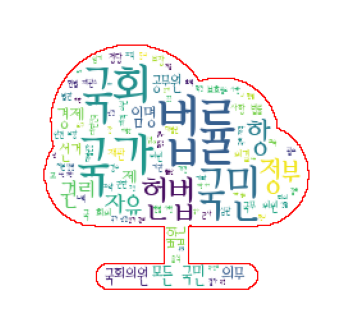

In [151]:
wordcloud = WordCloud(
                background_color='white',
                max_words=300,
                font_path='C:/Windows/Fonts/HMKMAMI.TTF',
                relative_scaling=0.2,
                colormap='viridis',
                stopwords=불용어,
                mask=mask,
                contour_color='red',
                contour_width=1
)
wordcloud.generate(data_noun)
plt.figure(figsize=(20, 4))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

(1124, 720, 3)

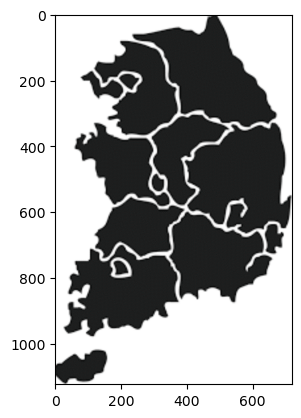

In [159]:
img = Image.open('data/south_korea.png').convert('RGB')
mask = np.array(img)
plt.imshow(mask)
mask.shape

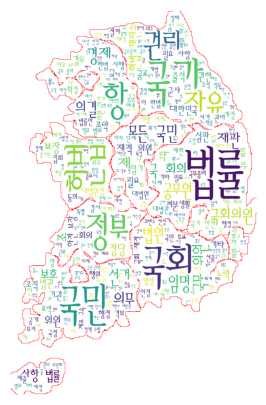

In [163]:
wordcloud = WordCloud(
                background_color='white',
                max_words=300,
                font_path='C:/Windows/Fonts/HMKMAMI.TTF',
                relative_scaling=0.2,
                colormap='viridis',
                stopwords=불용어,
                mask=mask,
                contour_color='red',
                contour_width=1,
                width=400,
                height=800
)
wordcloud.generate(data_noun)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

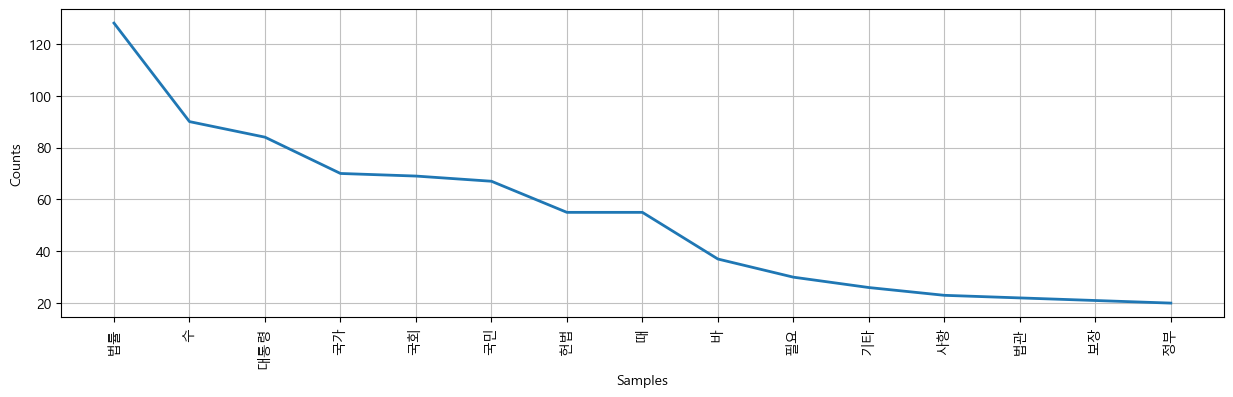

In [7]:
# 단어의 빈도수 시각화(nltk.Text)
# 워드 클라우드에 출현한 명사들을 ' '로 연결된 문자 : data_noun - 대한민국 헌법 유구 ...
# nltk.Text().plot(출현한 명사들 list) : word_list - ['대한민국', '헌법', '유구', ...]
import nltk
import matplotlib.pyplot as plt
from konlpy.tag import Komoran
from konlpy.corpus import kolaw
data = kolaw.open('constitution.txt').read()
komoran = Komoran()
# 일반명사(NNG), 고유명사(NNP), 의존명사(NNB)
word_list = [token for token, tag in komoran.pos(data) if tag in ('NNG', 'NNP', 'NNB')]
data_text = nltk.Text(word_list)
plt.rc('font', family='Malgun Gothic')  # 윈도우즈용
plt.figure(figsize=(15, 4))
data_text.plot(15)
plt.show()

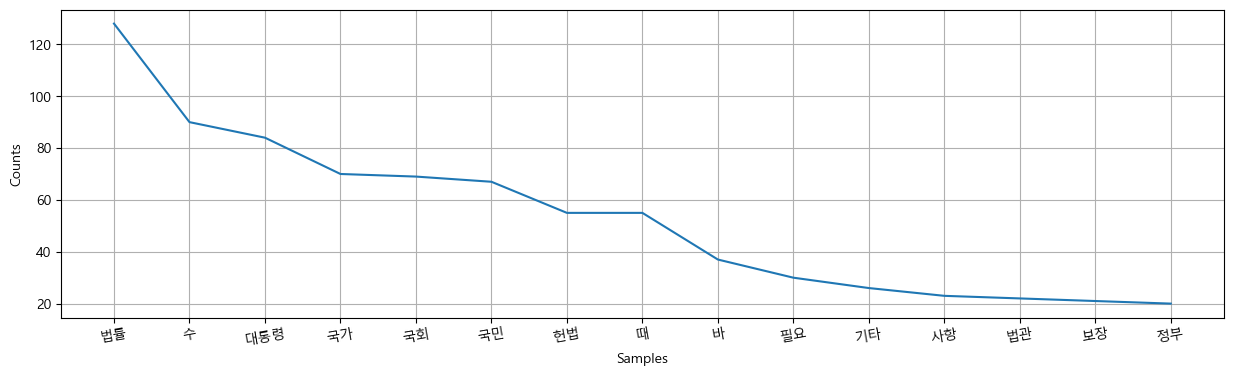

In [15]:
words, counts = zip(*data_text.vocab().most_common(15))
plt.figure(figsize=(15,4))
plt.plot(words, counts)
plt.xticks(rotation=10) # rotation 기본값 : 0
plt.xlabel("Samples")
plt.ylabel('Counts')
plt.grid()
plt.show()

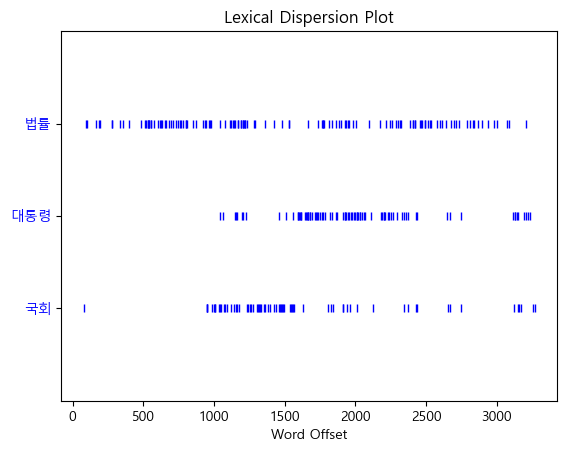

In [16]:
data_text.dispersion_plot(['법률','대통령','국회'])

# 6. 단어간 유사성 도출

In [2]:
import requests
from bs4 import BeautifulSoup
rss_url = 'http://fs.jtbc.joins.com/RSS/economy.xml'

In [3]:
jtbc_economy = requests.get(rss_url)
soup = BeautifulSoup(jtbc_economy.content, 'xml')
link_ele = soup.select('item link')
link_list = [link.text for link in link_ele]
print(len(link_list))
link_list

20


['https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220943',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220949',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220832',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220765',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220766',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220665',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220651',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220627',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220516',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220366',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220365',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220169',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12220180',
 'https://news.jtbc.co.kr/article/article.aspx?news_id=NB12219888',
 'https://news.jtbc.co.kr/article/article.aspx?n

In [4]:
# link_list들의 뉴스 기사 중 명사만 뽑아 list로 생성
from konlpy.tag import Komoran, Kkma
from mecab import MeCab
komoran = MeCab()
# news = [['등촌', '아파트', '재건축', ...],
#         ['사기', '캠핑', '예약', ...],
#         ['편의점', '도시락', ...]]
news = []
for link in link_list:
    response = requests.get(link)
    news_soup = BeautifulSoup(response.content, 'html.parser')
    title = news_soup.select_one('title').text.replace(' | JTBC 뉴스', '')
    content = str(news_soup.select_one('meta[name="description"]'))
    content = content.replace('<meta content="', '').replace('" name="description"/>', '')
    # print(title + ' ' + content)
    noun_list = komoran.nouns(title + ' ' + content)
    # print('noun 함수 사용 : ', noun_list)
    # 일반명사:NNG, 고유명사:NNP
    noun_list = [word for word, tag in komoran.pos(title + ' ' + content) if tag in ('NNG', 'NNP')]
    # print('pos tagging 이용 : ', noun_list)
    news.append(noun_list)

In [5]:
print('뉴스당 명사 갯수 : ', [len(nouns) for nouns in news])

뉴스당 명사 갯수 :  [164, 145, 18, 21, 27, 23, 26, 17, 18, 20, 26, 19, 21, 28, 26, 29, 31, 25, 21, 31]


In [6]:
[row[:5] for row in news]

[['둔촌', '주공', '전세', '홍수', '예상'],
 ['실제', '캠', '핑장', '관리', '소홀'],
 ['요즘', '편의점', '정도', '앵커', '육박'],
 ['오늘', '말', '이유', '편의점', '도시락'],
 ['경영', '분쟁', '주총', '표', '대결'],
 ['결혼', '돈', '걱정', '예비', '부부'],
 ['예비', '부부', '웨딩', '물가', '올해'],
 ['비정규직', '비중', '역대', '최고', '꼴'],
 ['대통령', '경제', '빨간불', '앵커', '어제'],
 ['수출', '뒷걸음질', '분기', '경제', '성장률'],
 ['날개', '하이닉스', '삼성전자', '역대', '급'],
 ['배추', '정부', '중순', '앵커', '배추'],
 ['내년', '추석', '황금연휴', '항공권', '예약'],
 ['역대', '급', '여름', '폭염', '탓'],
 ['바다', '전어', '현실', '피시', '플레이'],
 ['정부', '자본', '잠식', '티', '재무'],
 ['정부', '피해', '정부', '재무', '상태'],
 ['이상', '아파트', '거래', '최근', '최고'],
 ['서민', '동아줄', '디딤돌', '대출', '불안'],
 ['뉴욕', '증시', '다우', '사상', '최고']]

In [7]:
# 단어간 거리 계산 (워드 임베딩하기)
# pip install gensim
from gensim.models import Word2Vec
model = Word2Vec(news,
                window=10, # 각 단어 좌우 10개 단어를 학습 컨텍스트로 사용
                min_count=2, # 훈련 데이터에서 2회 이상 등장한 단어만 학습
                workers = -1) # 병렬처리수. -1은 모든 가용 코어를 사용

In [9]:
model.wv.most_similar('주공') # 위치상 가까운 단어들은 출력 

[('전어', 0.23761647939682007),
 ('문제', 0.2186410129070282),
 ('입주', 0.21086274087429047),
 ('디딤돌', 0.19114750623703003),
 ('규제', 0.17749573290348053),
 ('예약', 0.17367452383041382),
 ('폭염', 0.14910902082920074),
 ('아연', 0.14737188816070557),
 ('사진', 0.1462918370962143),
 ('예산', 0.14550352096557617)]